<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_2X/blob/main/GQtest_cluster_data(y_hat)_add_delta_(0_8)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_2X/addition_delta_0.8'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_0.8_n250.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,82.358716,60.649196,-1.124880,151.883032,153.080617,-1.197585
1,0.0,1.0,52.720295,65.960321,-5.221171,123.459446,128.860526,-5.401081
2,0.0,2.0,93.747732,99.170019,-4.672223,198.245528,203.256750,-5.011222
3,0.0,3.0,67.473704,41.470020,8.495361,127.439085,118.904655,8.534430
4,0.0,4.0,82.730034,80.756752,9.152215,182.639001,173.711083,8.927918
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,63.049487,95.370626,9.127916,177.548030,168.796403,8.751626
249996,999.0,246.0,99.241187,51.702888,-0.342728,160.601346,160.476910,0.124437
249997,999.0,247.0,37.588925,67.144369,-2.064764,112.668531,115.003841,-2.335310
249998,999.0,248.0,99.727632,47.988183,-1.544800,156.171016,157.200218,-1.029203


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    82.358716  60.649196 -1.124880  151.883032  153.080617 -1.197585
      1.0    52.720295  65.960321 -5.221171  123.459446  128.860526 -5.401081
      2.0    93.747732  99.170019 -4.672223  198.245528  203.256750 -5.011222
      3.0    67.473704  41.470020  8.495361  127.439085  118.904655  8.534430
      4.0    82.730034  80.756752  9.152215  182.639001  173.711083  8.927918
...                ...        ...       ...         ...         ...       ...
999.0 245.0  63.049487  95.370626  9.127916  177.548030  168.796403  8.751626
      246.0  99.241187  51.702888 -0.342728  160.601346  160.476910  0.124437
      247.0  37.588925  67.144369 -2.064764  112.668531  115.003841 -2.335310
      248.0  99.727632  47.988183 -1.544800  156.171016  157.200218 -1.029203
      249.0  76.757536  99.449945 -3.809109  182.398372  186.508846 -4.110474

[250000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    82.358716  60.649196 -1.124880  151.883032  153.080617 -1.197585
      1.0    52.720295  65.960321 -5.221171  123.459446  128.860526 -5.401081
      2.0    93.747732  99.170019 -4.672223  198.245528  203.256750 -5.011222
      3.0    67.473704  41.470020  8.495361  127.439085  118.904655  8.534430
      4.0    82.730034  80.756752  9.152215  182.639001  173.711083  8.927918
...                ...        ...       ...         ...         ...       ...
999.0 245.0  63.049487  95.370626  9.127916  177.548030  168.796403  8.751626
      246.0  99.241187  51.702888 -0.342728  160.601346  160.476910  0.124437
      247.0  37.588925  67.144369 -2.064764  112.668531  115.003841 -2.335310
      248.0  99.727632  47.988183 -1.544800  156.171016  157.200218 -1.029203
      249.0  76.757536  99.449945 -3.809109  182.398372  186.508846 -4.110474

[250000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,82.358716,60.649196,-1.124880,151.883032,153.080617,-1.197585
1,0.0,1.0,52.720295,65.960321,-5.221171,123.459446,128.860526,-5.401081
2,0.0,2.0,93.747732,99.170019,-4.672223,198.245528,203.256750,-5.011222
3,0.0,3.0,67.473704,41.470020,8.495361,127.439085,118.904655,8.534430
4,0.0,4.0,82.730034,80.756752,9.152215,182.639001,173.711083,8.927918
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,63.049487,95.370626,9.127916,177.548030,168.796403,8.751626
249996,999.0,246.0,99.241187,51.702888,-0.342728,160.601346,160.476910,0.124437
249997,999.0,247.0,37.588925,67.144369,-2.064764,112.668531,115.003841,-2.335310
249998,999.0,248.0,99.727632,47.988183,-1.544800,156.171016,157.200218,-1.029203


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    82.358716  60.649196 -1.124880  151.883032  153.080617 -1.197585
      1.0    52.720295  65.960321 -5.221171  123.459446  128.860526 -5.401081
      2.0    93.747732  99.170019 -4.672223  198.245528  203.256750 -5.011222
      3.0    67.473704  41.470020  8.495361  127.439085  118.904655  8.534430
      4.0    82.730034  80.756752  9.152215  182.639001  173.711083  8.927918
...                ...        ...       ...         ...         ...       ...
999.0 245.0  63.049487  95.370626  9.127916  177.548030  168.796403  8.751626
      246.0  99.241187  51.702888 -0.342728  160.601346  160.476910  0.124437
      247.0  37.588925  67.144369 -2.064764  112.668531  115.003841 -2.335310
      248.0  99.727632  47.988183 -1.544800  156.171016  157.200218 -1.029203
      249.0  76.757536  99.449945 -3.809109  182.398372  186.508846 -4.110474

[250000 rows x 6 columns]

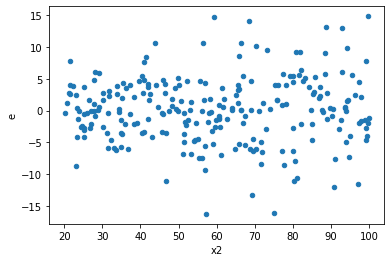

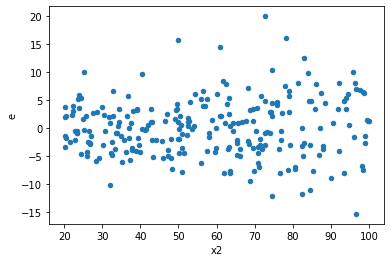

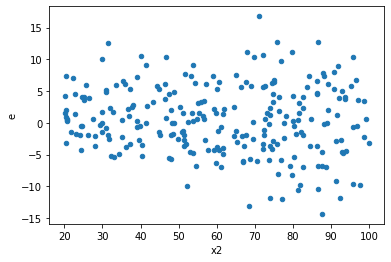

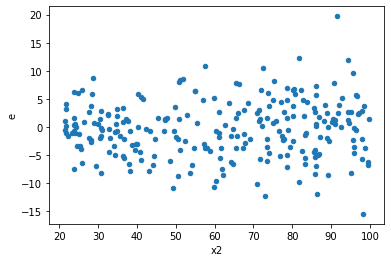

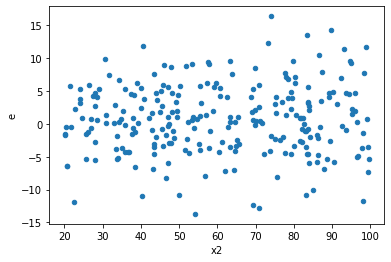

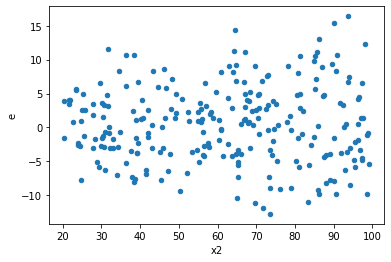

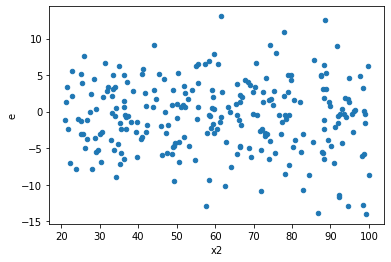

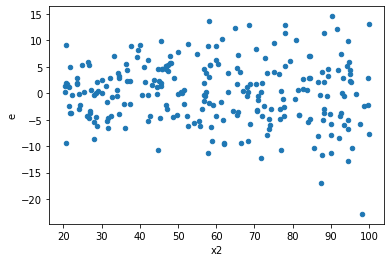

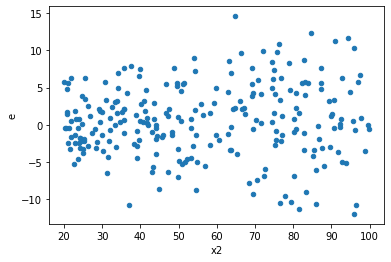

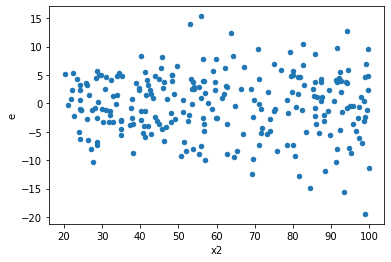

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
2.0,115.0,131.0,2044.7023229780375,4672.740907433349,17.780020199809023,35.66977791933854,2.006171956976836,0.00012341065229803938,0.999938294673851,6.170532614901969e-05,Reject001=0 : Heteroscedasticity
4.0,146.0,100.0,3725.654379224317,3164.4664397168303,25.51818067961861,31.644664397168302,1.2400830919126973,0.25036701512057924,0.8748164924397104,0.12518350756028962,Reject001=1 : Homoscedasticity
5.0,119.0,127.0,3291.3323431720805,4612.788463977909,27.65825498463933,36.32116900770007,1.3132126024534772,0.13131242537855958,0.9343437873107202,0.06565621268927979,Reject001=1 : Homoscedasticity
6.0,98.0,148.0,2002.8386791107503,3833.8331927715276,20.437129378681124,25.904278329537348,1.2675106102014135,0.19160879146344234,0.9041956042682788,0.09580439573172117,Reject001=1 : Homoscedasticity
7.0,115.0,131.0,2865.115202733813,5522.034747535346,24.914045241163592,42.15293700408661,1.6919346736370415,0.0036393461974342234,0.9981803269012829,0.0018196730987171117,Reject001=0 : Heteroscedasticity
9.0,127.0,119.0,2826.5934621059682,4403.010813585881,22.256641433905262,37.000090870469585,1.6624292115388302,0.005320772652514405,0.9973396136737428,0.0026603863262572025,Reject001=0 : Heteroscedasticity
11.0,124.0,122.0,2592.1783924058773,4007.786004329941,20.904664454886106,32.85070495352411,1.5714533483385245,0.012817658320958714,0.9935911708395206,0.006408829160479357,Reject001=1 : Homoscedasticity
15.0,113.0,133.0,2152.7547931650606,4344.770817244541,19.05092737314213,32.66744975371835,1.7147432832993055,0.0028533961015586584,0.9985733019492207,0.0014266980507793292,Reject001=0 : Heteroscedasticity
17.0,120.0,126.0,2710.820967902776,3979.5088906872716,22.59017473252313,31.583403894343427,1.398103567958362,0.06378779301109394,0.968106103494453,0.03189389650554697,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,102.0,144.0,3149.2726697303656,3332.4991238194752,30.875222252258485,23.142355026524132,0.7495445648113933,0.12206179304797592,Reject001=1 : Homoscedasticity
1.0,140.0,106.0,4745.515798122144,1773.6950104137227,33.89654141515817,16.732971796355873,0.4936483516537492,9.592020657234082e-05,Reject001=0 : Heteroscedasticity
2.0,115.0,131.0,2044.7023229780375,4672.740907433349,17.780020199809023,35.66977791933854,2.006171956976836,0.00012341065229803938,Reject001=0 : Heteroscedasticity
3.0,119.0,127.0,3744.5501010522603,2345.2264920641396,31.466807571867733,18.466350331213697,0.5868517258713962,0.0034936669139590958,Reject001=0 : Heteroscedasticity
4.0,146.0,100.0,3725.654379224317,3164.4664397168303,25.51818067961861,31.644664397168302,1.2400830919126973,0.25036701512057924,Reject001=1 : Homoscedasticity
5.0,119.0,127.0,3291.3323431720805,4612.788463977909,27.65825498463933,36.32116900770007,1.3132126024534772,0.13131242537855958,Reject001=1 : Homoscedasticity
6.0,98.0,148.0,2002.8386791107503,3833.8331927715276,20.437129378681124,25.904278329537348,1.2675106102014135,0.19160879146344234,Reject001=1 : Homoscedasticity
7.0,115.0,131.0,2865.115202733813,5522.034747535346,24.914045241163592,42.15293700408661,1.6919346736370415,0.0036393461974342234,Reject001=0 : Heteroscedasticity
8.0,129.0,117.0,3299.79169400021,2349.3902698080115,25.57978057364504,20.08025871630779,0.7850051199030443,0.17961706619015438,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      688
Reject001=0 : Heteroscedasticity    312
Name: Result_test, dtype: int64